Gaussian Mixture Model: modified from scikit-learn tutorial

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

E-Step: Evaluate the expection of complete-data likelihood

\begin{align}
\mathcal{Q}(\Phi|\Phi^t)&=E[\mathcal{L}_c(\Phi|X,Z)|X,\Phi^t]\\
&=\sum\limits_{\ell}\sum\limits_iE[z_i^{\ell}|X,\Phi^t][\log \pi_i+\log p_i(x^{\ell}|\Phi)]\\
&=\sum\limits_{\ell}\sum\limits_i h_i^{\ell} [\log \pi_i+\log p_i(x^{\ell}|\Phi)]
\end{align}

For gaussian mixture,
$$h_i^\ell=\frac{\pi_i|S_i|^{-1/2}exp[-\frac{1}{2}(x^\ell-m_i)^TS_i^{-1}((x^\ell-m_i))]}{\sum_j\pi_j|S_j|^{-1/2}exp[-\frac{1}{2}(x^\ell-m_j)^TS_i^{-1}((x^\ell-m_j))]}$$

M-Step: Maximiza $\mathcal{Q}$

\begin{align}
\Phi^{t+1}&=\arg\max\limits_\Phi\mathcal{Q}(\Phi|\Phi^t)\\
&=\arg\max\limits_\Phi\left[\sum\limits_\ell\sum\limits_ih^{(\ell)}_i\log\pi_i+\sum\limits_\ell\sum\limits_ih_i\log p_i(x^{(\ell)}|\Phi)^{(\ell)}\right]
\end{align}

Solving this with Lagrange multiplier gives
$$\pi_i=\sum_\ell h_i^{(\ell)}/N$$

$$m_i^{t+1}=\frac{\sum_\ell h_i^{(\ell)}x^{(\ell)}}{\sum_\ell h_i^{(\ell)}}$$

$$S_i^{t+1}=\frac{\sum_\ell h_i^{(\ell)}(x^{(\ell)}-m_i^{t+1})(x^{(\ell)}-m_i^{t+1})^T}{\sum_\ell h_i^{(\ell)}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from pprint import pprint
from matplotlib.colors import LogNorm

In [2]:
# generate samples with mean $mu$ and covariance $cov$

size = 3000 #size of data set

mu1, cov1 = [0, 0], [[1,0],[0,1]]
cluster0=np.random.multivariate_normal(mu1, cov1, size)

mu2, cov2 = [3, 3], [[1,0.8],[0,1]]
cluster1=np.random.multivariate_normal(mu2, cov2, size)

data = np.vstack([cluster0,cluster1])

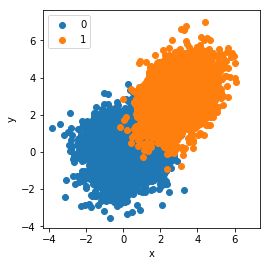

In [3]:
plt.figure(0)
plt.scatter(cluster0[:,0],cluster0[:,1])
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend([0,1])
plt.axis('square')
plt.show()

In [4]:
# training
clf = mixture.GaussianMixture(n_components = 2, covariance_type = 'full')
clf.fit(data)
pprint(vars(clf))

{'converged_': True,
 'covariance_type': 'full',
 'covariances_': array([[[ 0.91101608,  0.3520346 ],
        [ 0.3520346 ,  1.11341597]],

       [[ 1.09674876,  0.06016945],
        [ 0.06016945,  1.01397323]]]),
 'init_params': 'kmeans',
 'lower_bound_': -3.4551839648673419,
 'max_iter': 100,
 'means_': array([[ 3.01262421,  3.05588127],
       [ 0.0702804 ,  0.01410581]]),
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'n_iter_': 2,
 'precisions_': array([[[ 1.25045103, -0.39536169],
        [-0.39536169,  1.02314052]],

       [[ 0.91476387, -0.05428234],
        [-0.05428234,  0.98944046]]]),
 'precisions_cholesky_': array([[[ 1.04770008, -0.39086515],
        [ 0.        ,  1.01150409]],

       [[ 0.95487478, -0.05457123],
        [ 0.        ,  0.99470622]]]),
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_': array([ 0.49025358,  0.50974642]),
 'weights_init':

In [5]:
# classification
prediction = clf.predict(data)
pred_cluster0 = np.array([data[i] for i in range(size*2) if prediction[i]==0])
pred_cluster1 = np.array([data[i] for i in range(size*2) if prediction[i]==1])


In [6]:
# contour plots
x = np.linspace(-6,6)
y = np.linspace(-6,6)
X, Y = np.meshgrid(x,y)
XX = np.array([X.ravel(),Y.ravel()]).T
Z=-clf.score_samples(XX)
Z=Z.reshape(X.shape)

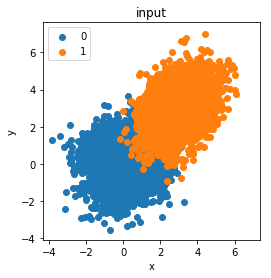

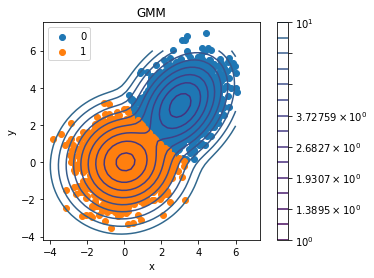

In [7]:
# ground truth
plt.figure(0)
plt.clf()
plt.scatter(cluster0[:,0],cluster0[:,1])
plt.scatter(cluster1[:,0],cluster1[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend([0,1])
plt.title("input")
plt.axis('square')

#classification from GMM
plt.figure(1)
plt.clf()
plt.scatter(pred_cluster0[:,0],pred_cluster0[:,1])
plt.scatter(pred_cluster1[:,0],pred_cluster1[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend([0,1])
plt.axis('square')
plt.title("GMM")

plt.contour(X,Y,Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 1, 15))
plt.colorbar()
plt.show()
